# Computer Vision: Assignment 3 Part 1 - Some CNN Basics [50%]

Spring 2022 semester.

Due date: **July 1st 2022.**

## Introduction

This question is an introduction to using PyTorch for training simple neural net models. 

Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

Perform this assignment in PyTorch, modifying the baseline code, producing outputs and adding required explanations - *all within this ipython notebook*.

Finally, submit this iPython notebook, including outputs, as an .ipynb file. 

## Question (1): Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

**a)**  Use `matplotlib` and ipython notebook's visualization capabilities to display the average train and average test image of each class, for each of the two datasets.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

## Question (2): Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST. By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 10 epochs (passes through the training data). 

The cross-entropy loss function computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given target.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

**a)** Add code to plot out the network weights as images (one for each class, of size 28 by 28) after the last epoch. (Hint thread: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) )

**b)** Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Question (3): Training a Multi-Layer Network on MNIST [10%]

**a)**  Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class].

**b)**   Now retrain the model for 10 epochs with each of the learning rates in the set {0.01, 0.1, 1, 10} and test the resulting model. Create a figure and plot the loss curves of each of the four runs for comparison. Explain the obtained (train and test) results.

## Question (4): Training a Convolutional Network on CIFAR [15%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, stride 2, 16 feature maps + Tanh nonlinearity.
  - Convolution with 3 by 3 filters, (stride 1), 64 feature maps + Tanh nonlinearity.
  - Convolution with 3 by 3 filters, (stride 1), 64 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

**a)** Train it for 20 epochs on CIFAR-10 and plot the training loss curve (avg. loss per epoch) and final test loss and accuracy, when training with or without the two 3x3 convolutional layers. 

**b)**  Give a breakdown of the number of parameters (per layer) within the above model, as well as the overall number.

# **Answer (1):**
create needed blocks of code (and results) below

In [105]:
# imports
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torchvision.models as models

import torchvision
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
def imshow(img1, img2, dataset, label):
    img1 = img1 / 2 + 0.5  # un-normalize
    img2 = img2 / 2 + 0.5
    np_img1, np_img2 = img1.numpy(), img2.numpy()

    plt.figure()
    plt.suptitle(dataset + " dataset average: Class " + label)
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(np_img1, (1, 2, 0)))
    plt.title('Train')
    plt.subplot(1, 2, 2)
    plt.imshow(np.transpose(np_img2, (1, 2, 0)))
    plt.title('Test')
    plt.show()

In [4]:
def show_average_images(train_loader, test_loader, dataset, labels):
    
    train_counters, test_counters = [], []
    train_results, test_results = [], []
    
    for _ in range(len(labels)):
        train_counters.append(0)
        test_counters.append(0)
        train_results.append(None)
        test_results.append(None)
    
    dataiter = iter(train_loader)
    
    while True:
        try:
            img_temp, label_temp = dataiter.next()
            
            for ind in range(len(labels)):
                if str(label_temp) == 'tensor([' + str(ind) + '])':
                    train_counters[ind] += 1
                    if train_results[ind] is None:
                        train_results[ind] = img_temp
                    else:
                        train_results[ind] += img_temp

        except StopIteration:
            break

    dataiter = iter(test_loader)
    
    while True:
        try:
            img_temp, label_temp = dataiter.next()
            
            for ind in range(len(labels)):
                if str(label_temp) == 'tensor([' + str(ind) + '])':
                    test_counters[ind] += 1
                    if test_results[ind] is None:
                        test_results[ind] = img_temp
                    else:
                        test_results[ind] += img_temp

        except StopIteration:
            break
        
    for index, label in enumerate(labels):
        
        test_results[index] /= test_counters[index]
        train_results[index] /= train_counters[index]

        imshow(torchvision.utils.make_grid(train_results[index]), torchvision.utils.make_grid(test_results[index]), 
               dataset, labels[index])

Files already downloaded and verified
Files already downloaded and verified


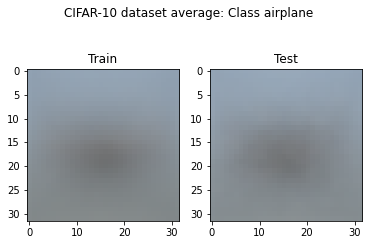

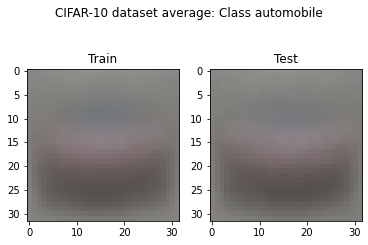

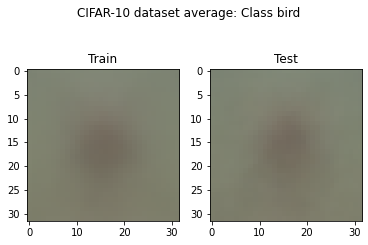

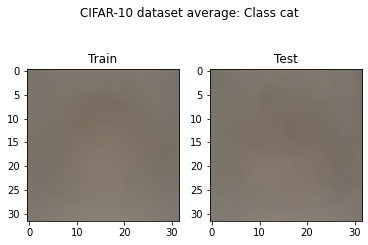

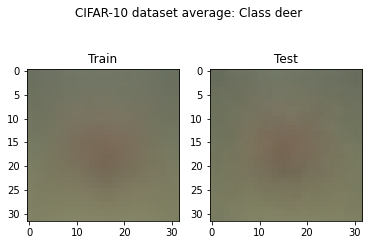

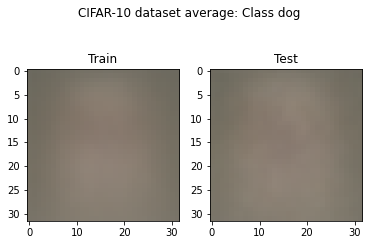

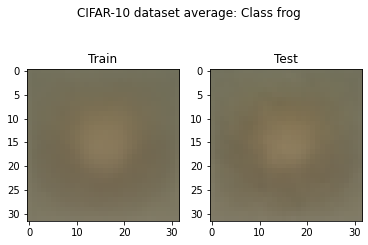

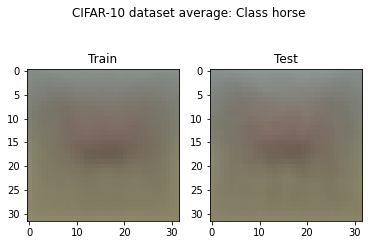

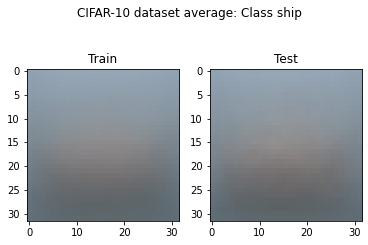

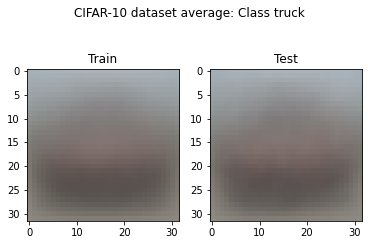

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


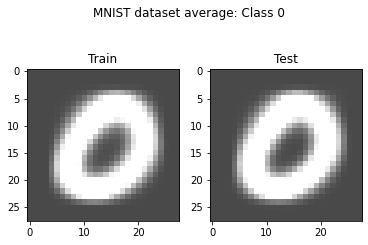

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


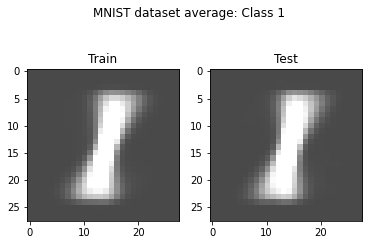

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


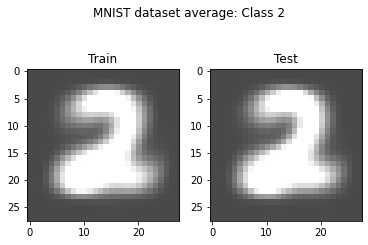

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


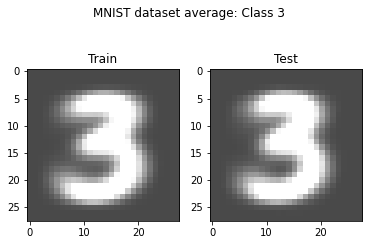

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


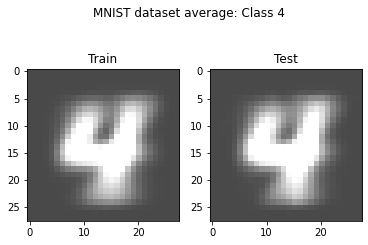

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


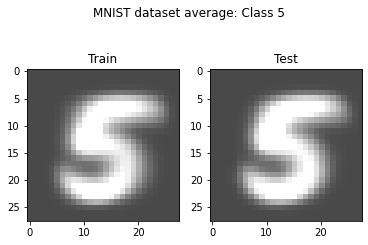

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


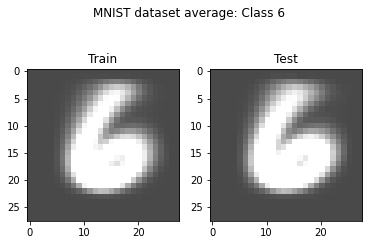

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


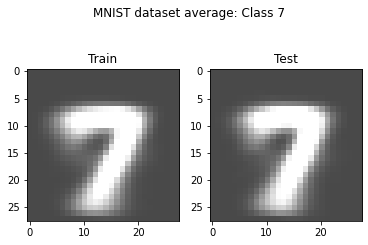

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


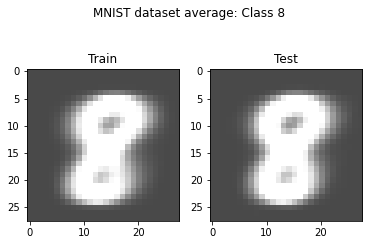

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


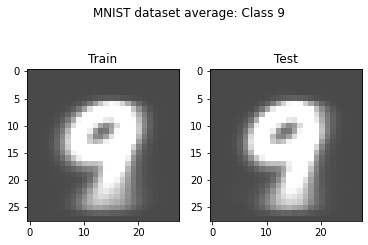

In [5]:
torch.utils.data.DataLoader.num_worker = 0

cifar_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

mnist_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])

cifar_train = torchvision.datasets.CIFAR10(root='.', train=True,
                                           download=True, transform=cifar_transform)

cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=1,
                                                 shuffle=True, num_workers=2)

cifar_test = torchvision.datasets.CIFAR10(root='.', train=False,
                                          download=True, transform=cifar_transform)

cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=1,
                                                shuffle=False, num_workers=2)

mnist_train = torchvision.datasets.MNIST(root='.', train=True,
                                         download=True, transform=mnist_transform)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=1,
                                                 shuffle=True, num_workers=2)

mnist_test = torchvision.datasets.MNIST(root='.', train=False,
                                        download=True, transform=mnist_transform)

mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1,
                                                shuffle=False, num_workers=2)

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

show_average_images(cifar_train_loader, cifar_test_loader, 'CIFAR-10', cifar_labels)
show_average_images(mnist_train_loader, mnist_test_loader, 'MNIST', mnist_labels)

# **Answer (2):**
create needed blocks of code (and results) below

In [6]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [7]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [8]:
# train and test functions
def train(epoch, train_loader):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(test_loader):
    test_loss_curve=[]
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        test_loss_curve.append(F.cross_entropy(output, target, reduction='sum').item())
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss_curve

In [9]:
# Training and testing 
for i in range(1, epochs+1):
  train(i, mnist_train_loader)

# resetting the value of batch size in the DataLoader objects
cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size,
                                                 shuffle=True, num_workers=2)

cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size,
                                                shuffle=False, num_workers=2)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                                 shuffle=True, num_workers=2)

mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
                                                shuffle=False, num_workers=2)

test(mnist_test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 1.435470
Train Epoch: 1 [100/60000 (0%)]	Loss: 0.701528
Train Epoch: 1 [200/60000 (0%)]	Loss: 1.051471
Train Epoch: 1 [300/60000 (0%)]	Loss: 0.040854
Train Epoch: 1 [400/60000 (1%)]	Loss: 0.006365
Train Epoch: 1 [500/60000 (1%)]	Loss: 0.003189
Train Epoch: 1 [600/60000 (1%)]	Loss: 0.276815
Train Epoch: 1 [700/60000 (1%)]	Loss: 0.000002
Train Epoch: 1 [800/60000 (1%)]	Loss: 0.468737
Train Epoch: 1 [900/60000 (2%)]	Loss: 7.683015
Train Epoch: 1 [1000/60000 (2%)]	Loss: 0.068852
Train Epoch: 1 [1100/60000 (2%)]	Loss: 0.069896
Train Epoch: 1 [1200/60000 (2%)]	Loss: 0.066991
Train Epoch: 1 [1300/60000 (2%)]	Loss: 0.068988
Train Epoch: 1 [1400/60000 (2%)]	Loss: 0.811713
Train Epoch: 1 [1500/60000 (2%)]	Loss: 0.000451
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.147154
Train Epoch: 1 [1700/60000 (3%)]	Loss: 0.000017
Train Epoch: 1 [1800/60000 (3%)]	Loss: 0.003850
Train Epoch: 1 [1900/60000 (3%)]	Loss: 2.948659
Train Epoch: 1 [2000/60000 (3%)]	Loss: 0.000103
Trai

Train Epoch: 1 [16800/60000 (28%)]	Loss: 0.000032
Train Epoch: 1 [16900/60000 (28%)]	Loss: 0.000002
Train Epoch: 1 [17000/60000 (28%)]	Loss: 0.001241
Train Epoch: 1 [17100/60000 (28%)]	Loss: 0.000000
Train Epoch: 1 [17200/60000 (29%)]	Loss: 0.040072
Train Epoch: 1 [17300/60000 (29%)]	Loss: 0.000003
Train Epoch: 1 [17400/60000 (29%)]	Loss: 0.000256
Train Epoch: 1 [17500/60000 (29%)]	Loss: 0.003534
Train Epoch: 1 [17600/60000 (29%)]	Loss: 0.000041
Train Epoch: 1 [17700/60000 (30%)]	Loss: 0.356346
Train Epoch: 1 [17800/60000 (30%)]	Loss: 0.000088
Train Epoch: 1 [17900/60000 (30%)]	Loss: 0.000001
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.000150
Train Epoch: 1 [18100/60000 (30%)]	Loss: 0.000230
Train Epoch: 1 [18200/60000 (30%)]	Loss: 0.000002
Train Epoch: 1 [18300/60000 (30%)]	Loss: 0.000017
Train Epoch: 1 [18400/60000 (31%)]	Loss: 0.988895
Train Epoch: 1 [18500/60000 (31%)]	Loss: 0.000002
Train Epoch: 1 [18600/60000 (31%)]	Loss: 0.000000
Train Epoch: 1 [18700/60000 (31%)]	Loss: 0.000051


Train Epoch: 1 [33200/60000 (55%)]	Loss: 0.000000
Train Epoch: 1 [33300/60000 (56%)]	Loss: 0.000006
Train Epoch: 1 [33400/60000 (56%)]	Loss: 0.000000
Train Epoch: 1 [33500/60000 (56%)]	Loss: 0.000647
Train Epoch: 1 [33600/60000 (56%)]	Loss: 0.071249
Train Epoch: 1 [33700/60000 (56%)]	Loss: 0.000000
Train Epoch: 1 [33800/60000 (56%)]	Loss: 0.000000
Train Epoch: 1 [33900/60000 (56%)]	Loss: 0.000007
Train Epoch: 1 [34000/60000 (57%)]	Loss: 0.000020
Train Epoch: 1 [34100/60000 (57%)]	Loss: 0.030445
Train Epoch: 1 [34200/60000 (57%)]	Loss: 0.007037
Train Epoch: 1 [34300/60000 (57%)]	Loss: 0.013979
Train Epoch: 1 [34400/60000 (57%)]	Loss: 13.364213
Train Epoch: 1 [34500/60000 (58%)]	Loss: 0.000353
Train Epoch: 1 [34600/60000 (58%)]	Loss: 0.000000
Train Epoch: 1 [34700/60000 (58%)]	Loss: 0.000672
Train Epoch: 1 [34800/60000 (58%)]	Loss: 9.366701
Train Epoch: 1 [34900/60000 (58%)]	Loss: 0.000000
Train Epoch: 1 [35000/60000 (58%)]	Loss: 1.056587
Train Epoch: 1 [35100/60000 (58%)]	Loss: 3.060714

Train Epoch: 1 [49700/60000 (83%)]	Loss: 3.123330
Train Epoch: 1 [49800/60000 (83%)]	Loss: 0.000000
Train Epoch: 1 [49900/60000 (83%)]	Loss: 0.000000
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.000000
Train Epoch: 1 [50100/60000 (84%)]	Loss: 0.000002
Train Epoch: 1 [50200/60000 (84%)]	Loss: 0.000000
Train Epoch: 1 [50300/60000 (84%)]	Loss: 18.372768
Train Epoch: 1 [50400/60000 (84%)]	Loss: 0.000000
Train Epoch: 1 [50500/60000 (84%)]	Loss: 0.000000
Train Epoch: 1 [50600/60000 (84%)]	Loss: 0.000000
Train Epoch: 1 [50700/60000 (84%)]	Loss: 0.000005
Train Epoch: 1 [50800/60000 (85%)]	Loss: 0.000768
Train Epoch: 1 [50900/60000 (85%)]	Loss: 0.068916
Train Epoch: 1 [51000/60000 (85%)]	Loss: 0.000082
Train Epoch: 1 [51100/60000 (85%)]	Loss: 0.910481
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.000000
Train Epoch: 1 [51300/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [51400/60000 (86%)]	Loss: 0.225017
Train Epoch: 1 [51500/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [51600/60000 (86%)]	Loss: 2.607222

Train Epoch: 2 [6500/60000 (11%)]	Loss: 0.000041
Train Epoch: 2 [6600/60000 (11%)]	Loss: 4.898201
Train Epoch: 2 [6700/60000 (11%)]	Loss: 2.559515
Train Epoch: 2 [6800/60000 (11%)]	Loss: 0.000073
Train Epoch: 2 [6900/60000 (12%)]	Loss: 0.002904
Train Epoch: 2 [7000/60000 (12%)]	Loss: 0.001444
Train Epoch: 2 [7100/60000 (12%)]	Loss: 0.000000
Train Epoch: 2 [7200/60000 (12%)]	Loss: 0.000000
Train Epoch: 2 [7300/60000 (12%)]	Loss: 0.000000
Train Epoch: 2 [7400/60000 (12%)]	Loss: 0.000004
Train Epoch: 2 [7500/60000 (12%)]	Loss: 0.213031
Train Epoch: 2 [7600/60000 (13%)]	Loss: 0.006641
Train Epoch: 2 [7700/60000 (13%)]	Loss: 0.984117
Train Epoch: 2 [7800/60000 (13%)]	Loss: 0.000152
Train Epoch: 2 [7900/60000 (13%)]	Loss: 0.029238
Train Epoch: 2 [8000/60000 (13%)]	Loss: 0.000859
Train Epoch: 2 [8100/60000 (14%)]	Loss: 0.001773
Train Epoch: 2 [8200/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8300/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8400/60000 (14%)]	Loss: 0.000105
Train Epoch: 2 [8500

Train Epoch: 2 [23000/60000 (38%)]	Loss: 0.000000
Train Epoch: 2 [23100/60000 (38%)]	Loss: 0.000000
Train Epoch: 2 [23200/60000 (39%)]	Loss: 0.000109
Train Epoch: 2 [23300/60000 (39%)]	Loss: 0.000021
Train Epoch: 2 [23400/60000 (39%)]	Loss: 30.066002
Train Epoch: 2 [23500/60000 (39%)]	Loss: 0.000000
Train Epoch: 2 [23600/60000 (39%)]	Loss: 4.030002
Train Epoch: 2 [23700/60000 (40%)]	Loss: 0.000000
Train Epoch: 2 [23800/60000 (40%)]	Loss: 0.000000
Train Epoch: 2 [23900/60000 (40%)]	Loss: 0.000002
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.021914
Train Epoch: 2 [24100/60000 (40%)]	Loss: 0.000000
Train Epoch: 2 [24200/60000 (40%)]	Loss: 0.015316
Train Epoch: 2 [24300/60000 (40%)]	Loss: 0.000000
Train Epoch: 2 [24400/60000 (41%)]	Loss: 0.000527
Train Epoch: 2 [24500/60000 (41%)]	Loss: 0.142084
Train Epoch: 2 [24600/60000 (41%)]	Loss: 0.000005
Train Epoch: 2 [24700/60000 (41%)]	Loss: 6.625290
Train Epoch: 2 [24800/60000 (41%)]	Loss: 0.000000
Train Epoch: 2 [24900/60000 (42%)]	Loss: 9.035762

Train Epoch: 2 [39400/60000 (66%)]	Loss: 0.000000
Train Epoch: 2 [39500/60000 (66%)]	Loss: 0.000000
Train Epoch: 2 [39600/60000 (66%)]	Loss: 0.000350
Train Epoch: 2 [39700/60000 (66%)]	Loss: 0.005209
Train Epoch: 2 [39800/60000 (66%)]	Loss: 0.000003
Train Epoch: 2 [39900/60000 (66%)]	Loss: 0.000086
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.000000
Train Epoch: 2 [40100/60000 (67%)]	Loss: 0.001758
Train Epoch: 2 [40200/60000 (67%)]	Loss: 0.000149
Train Epoch: 2 [40300/60000 (67%)]	Loss: 0.000071
Train Epoch: 2 [40400/60000 (67%)]	Loss: 0.010287
Train Epoch: 2 [40500/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [40600/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [40700/60000 (68%)]	Loss: 0.013204
Train Epoch: 2 [40800/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [40900/60000 (68%)]	Loss: 0.000117
Train Epoch: 2 [41000/60000 (68%)]	Loss: 0.026064
Train Epoch: 2 [41100/60000 (68%)]	Loss: 0.000068
Train Epoch: 2 [41200/60000 (69%)]	Loss: 0.442940
Train Epoch: 2 [41300/60000 (69%)]	Loss: 4.411729


Train Epoch: 2 [56000/60000 (93%)]	Loss: 0.000000
Train Epoch: 2 [56100/60000 (94%)]	Loss: 0.000001
Train Epoch: 2 [56200/60000 (94%)]	Loss: 0.000000
Train Epoch: 2 [56300/60000 (94%)]	Loss: 0.000000
Train Epoch: 2 [56400/60000 (94%)]	Loss: 0.000000
Train Epoch: 2 [56500/60000 (94%)]	Loss: 0.000000
Train Epoch: 2 [56600/60000 (94%)]	Loss: 0.001749
Train Epoch: 2 [56700/60000 (94%)]	Loss: 0.071530
Train Epoch: 2 [56800/60000 (95%)]	Loss: 0.000001
Train Epoch: 2 [56900/60000 (95%)]	Loss: 19.478346
Train Epoch: 2 [57000/60000 (95%)]	Loss: 1.614519
Train Epoch: 2 [57100/60000 (95%)]	Loss: 0.004994
Train Epoch: 2 [57200/60000 (95%)]	Loss: 0.000006
Train Epoch: 2 [57300/60000 (96%)]	Loss: 0.000003
Train Epoch: 2 [57400/60000 (96%)]	Loss: 8.799488
Train Epoch: 2 [57500/60000 (96%)]	Loss: 0.000154
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.012687
Train Epoch: 2 [57700/60000 (96%)]	Loss: 0.002328
Train Epoch: 2 [57800/60000 (96%)]	Loss: 0.000002
Train Epoch: 2 [57900/60000 (96%)]	Loss: 0.000559

Train Epoch: 3 [13000/60000 (22%)]	Loss: 0.000000
Train Epoch: 3 [13100/60000 (22%)]	Loss: 0.000000
Train Epoch: 3 [13200/60000 (22%)]	Loss: 0.001975
Train Epoch: 3 [13300/60000 (22%)]	Loss: 0.000002
Train Epoch: 3 [13400/60000 (22%)]	Loss: 2.107343
Train Epoch: 3 [13500/60000 (22%)]	Loss: 11.315849
Train Epoch: 3 [13600/60000 (23%)]	Loss: 0.007881
Train Epoch: 3 [13700/60000 (23%)]	Loss: 0.000124
Train Epoch: 3 [13800/60000 (23%)]	Loss: 0.000046
Train Epoch: 3 [13900/60000 (23%)]	Loss: 0.000000
Train Epoch: 3 [14000/60000 (23%)]	Loss: 0.000010
Train Epoch: 3 [14100/60000 (24%)]	Loss: 0.000000
Train Epoch: 3 [14200/60000 (24%)]	Loss: 0.194999
Train Epoch: 3 [14300/60000 (24%)]	Loss: 0.000015
Train Epoch: 3 [14400/60000 (24%)]	Loss: 0.007726
Train Epoch: 3 [14500/60000 (24%)]	Loss: 0.000001
Train Epoch: 3 [14600/60000 (24%)]	Loss: 0.000000
Train Epoch: 3 [14700/60000 (24%)]	Loss: 0.000162
Train Epoch: 3 [14800/60000 (25%)]	Loss: 0.000000
Train Epoch: 3 [14900/60000 (25%)]	Loss: 0.000000

Train Epoch: 3 [29600/60000 (49%)]	Loss: 0.000522
Train Epoch: 3 [29700/60000 (50%)]	Loss: 0.000000
Train Epoch: 3 [29800/60000 (50%)]	Loss: 0.000001
Train Epoch: 3 [29900/60000 (50%)]	Loss: 0.000017
Train Epoch: 3 [30000/60000 (50%)]	Loss: 12.145966
Train Epoch: 3 [30100/60000 (50%)]	Loss: 0.000000
Train Epoch: 3 [30200/60000 (50%)]	Loss: 0.000015
Train Epoch: 3 [30300/60000 (50%)]	Loss: 0.000001
Train Epoch: 3 [30400/60000 (51%)]	Loss: 0.000000
Train Epoch: 3 [30500/60000 (51%)]	Loss: 0.000261
Train Epoch: 3 [30600/60000 (51%)]	Loss: 0.004056
Train Epoch: 3 [30700/60000 (51%)]	Loss: 0.039326
Train Epoch: 3 [30800/60000 (51%)]	Loss: 0.000000
Train Epoch: 3 [30900/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31000/60000 (52%)]	Loss: 0.577036
Train Epoch: 3 [31100/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31200/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31300/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31400/60000 (52%)]	Loss: 3.641980
Train Epoch: 3 [31500/60000 (52%)]	Loss: 0.000935

Train Epoch: 3 [46000/60000 (77%)]	Loss: 0.000704
Train Epoch: 3 [46100/60000 (77%)]	Loss: 0.000121
Train Epoch: 3 [46200/60000 (77%)]	Loss: 0.000004
Train Epoch: 3 [46300/60000 (77%)]	Loss: 0.000030
Train Epoch: 3 [46400/60000 (77%)]	Loss: 0.000000
Train Epoch: 3 [46500/60000 (78%)]	Loss: 0.000000
Train Epoch: 3 [46600/60000 (78%)]	Loss: 0.000000
Train Epoch: 3 [46700/60000 (78%)]	Loss: 0.000048
Train Epoch: 3 [46800/60000 (78%)]	Loss: 2.003648
Train Epoch: 3 [46900/60000 (78%)]	Loss: 0.000000
Train Epoch: 3 [47000/60000 (78%)]	Loss: 0.000000
Train Epoch: 3 [47100/60000 (78%)]	Loss: 0.000000
Train Epoch: 3 [47200/60000 (79%)]	Loss: 0.050386
Train Epoch: 3 [47300/60000 (79%)]	Loss: 2.934215
Train Epoch: 3 [47400/60000 (79%)]	Loss: 0.000001
Train Epoch: 3 [47500/60000 (79%)]	Loss: 0.032265
Train Epoch: 3 [47600/60000 (79%)]	Loss: 3.913815
Train Epoch: 3 [47700/60000 (80%)]	Loss: 0.001419
Train Epoch: 3 [47800/60000 (80%)]	Loss: 0.000445
Train Epoch: 3 [47900/60000 (80%)]	Loss: 0.000000


Train Epoch: 4 [2800/60000 (5%)]	Loss: 11.968149
Train Epoch: 4 [2900/60000 (5%)]	Loss: 0.000004
Train Epoch: 4 [3000/60000 (5%)]	Loss: 0.101822
Train Epoch: 4 [3100/60000 (5%)]	Loss: 0.000000
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.000798
Train Epoch: 4 [3300/60000 (6%)]	Loss: 0.002324
Train Epoch: 4 [3400/60000 (6%)]	Loss: 0.000016
Train Epoch: 4 [3500/60000 (6%)]	Loss: 0.000251
Train Epoch: 4 [3600/60000 (6%)]	Loss: 0.000495
Train Epoch: 4 [3700/60000 (6%)]	Loss: 0.000012
Train Epoch: 4 [3800/60000 (6%)]	Loss: 0.000000
Train Epoch: 4 [3900/60000 (6%)]	Loss: 0.000105
Train Epoch: 4 [4000/60000 (7%)]	Loss: 0.001676
Train Epoch: 4 [4100/60000 (7%)]	Loss: 0.000439
Train Epoch: 4 [4200/60000 (7%)]	Loss: 0.000060
Train Epoch: 4 [4300/60000 (7%)]	Loss: 0.000000
Train Epoch: 4 [4400/60000 (7%)]	Loss: 0.033107
Train Epoch: 4 [4500/60000 (8%)]	Loss: 0.768246
Train Epoch: 4 [4600/60000 (8%)]	Loss: 0.084237
Train Epoch: 4 [4700/60000 (8%)]	Loss: 1.296054
Train Epoch: 4 [4800/60000 (8%)]	Loss: 

Train Epoch: 4 [19500/60000 (32%)]	Loss: 0.000000
Train Epoch: 4 [19600/60000 (33%)]	Loss: 0.000000
Train Epoch: 4 [19700/60000 (33%)]	Loss: 0.000000
Train Epoch: 4 [19800/60000 (33%)]	Loss: 0.002610
Train Epoch: 4 [19900/60000 (33%)]	Loss: 0.000000
Train Epoch: 4 [20000/60000 (33%)]	Loss: 0.000111
Train Epoch: 4 [20100/60000 (34%)]	Loss: 0.000016
Train Epoch: 4 [20200/60000 (34%)]	Loss: 0.000369
Train Epoch: 4 [20300/60000 (34%)]	Loss: 0.000000
Train Epoch: 4 [20400/60000 (34%)]	Loss: 0.000000
Train Epoch: 4 [20500/60000 (34%)]	Loss: 0.000048
Train Epoch: 4 [20600/60000 (34%)]	Loss: 0.000000
Train Epoch: 4 [20700/60000 (34%)]	Loss: 0.000001
Train Epoch: 4 [20800/60000 (35%)]	Loss: 0.000114
Train Epoch: 4 [20900/60000 (35%)]	Loss: 0.000000
Train Epoch: 4 [21000/60000 (35%)]	Loss: 0.000017
Train Epoch: 4 [21100/60000 (35%)]	Loss: 0.000009
Train Epoch: 4 [21200/60000 (35%)]	Loss: 0.000000
Train Epoch: 4 [21300/60000 (36%)]	Loss: 0.000190
Train Epoch: 4 [21400/60000 (36%)]	Loss: 0.000212


Train Epoch: 4 [36000/60000 (60%)]	Loss: 0.000073
Train Epoch: 4 [36100/60000 (60%)]	Loss: 0.000000
Train Epoch: 4 [36200/60000 (60%)]	Loss: 0.000000
Train Epoch: 4 [36300/60000 (60%)]	Loss: 0.000702
Train Epoch: 4 [36400/60000 (61%)]	Loss: 0.000000
Train Epoch: 4 [36500/60000 (61%)]	Loss: 0.000000
Train Epoch: 4 [36600/60000 (61%)]	Loss: 0.005296
Train Epoch: 4 [36700/60000 (61%)]	Loss: 0.000003
Train Epoch: 4 [36800/60000 (61%)]	Loss: 0.000000
Train Epoch: 4 [36900/60000 (62%)]	Loss: 0.000000
Train Epoch: 4 [37000/60000 (62%)]	Loss: 7.370984
Train Epoch: 4 [37100/60000 (62%)]	Loss: 0.000000
Train Epoch: 4 [37200/60000 (62%)]	Loss: 0.000000
Train Epoch: 4 [37300/60000 (62%)]	Loss: 0.000007
Train Epoch: 4 [37400/60000 (62%)]	Loss: 0.000001
Train Epoch: 4 [37500/60000 (62%)]	Loss: 0.138370
Train Epoch: 4 [37600/60000 (63%)]	Loss: 0.000000
Train Epoch: 4 [37700/60000 (63%)]	Loss: 0.008286
Train Epoch: 4 [37800/60000 (63%)]	Loss: 0.000000
Train Epoch: 4 [37900/60000 (63%)]	Loss: 0.000000


Train Epoch: 4 [52500/60000 (88%)]	Loss: 0.000371
Train Epoch: 4 [52600/60000 (88%)]	Loss: 0.000006
Train Epoch: 4 [52700/60000 (88%)]	Loss: 0.000000
Train Epoch: 4 [52800/60000 (88%)]	Loss: 0.000000
Train Epoch: 4 [52900/60000 (88%)]	Loss: 0.000248
Train Epoch: 4 [53000/60000 (88%)]	Loss: 0.000000
Train Epoch: 4 [53100/60000 (88%)]	Loss: 0.000000
Train Epoch: 4 [53200/60000 (89%)]	Loss: 0.000389
Train Epoch: 4 [53300/60000 (89%)]	Loss: 0.000232
Train Epoch: 4 [53400/60000 (89%)]	Loss: 0.002337
Train Epoch: 4 [53500/60000 (89%)]	Loss: 3.520752
Train Epoch: 4 [53600/60000 (89%)]	Loss: 0.000829
Train Epoch: 4 [53700/60000 (90%)]	Loss: 0.000000
Train Epoch: 4 [53800/60000 (90%)]	Loss: 0.000000
Train Epoch: 4 [53900/60000 (90%)]	Loss: 0.001874
Train Epoch: 4 [54000/60000 (90%)]	Loss: 0.000707
Train Epoch: 4 [54100/60000 (90%)]	Loss: 0.000014
Train Epoch: 4 [54200/60000 (90%)]	Loss: 0.000000
Train Epoch: 4 [54300/60000 (90%)]	Loss: 0.000000
Train Epoch: 4 [54400/60000 (91%)]	Loss: 17.791162

Train Epoch: 5 [9300/60000 (16%)]	Loss: 0.000000
Train Epoch: 5 [9400/60000 (16%)]	Loss: 0.000007
Train Epoch: 5 [9500/60000 (16%)]	Loss: 3.021677
Train Epoch: 5 [9600/60000 (16%)]	Loss: 0.334578
Train Epoch: 5 [9700/60000 (16%)]	Loss: 10.020918
Train Epoch: 5 [9800/60000 (16%)]	Loss: 0.001991
Train Epoch: 5 [9900/60000 (16%)]	Loss: 27.411957
Train Epoch: 5 [10000/60000 (17%)]	Loss: 0.000000
Train Epoch: 5 [10100/60000 (17%)]	Loss: 0.000000
Train Epoch: 5 [10200/60000 (17%)]	Loss: 0.000002
Train Epoch: 5 [10300/60000 (17%)]	Loss: 0.000000
Train Epoch: 5 [10400/60000 (17%)]	Loss: 0.000046
Train Epoch: 5 [10500/60000 (18%)]	Loss: 0.000005
Train Epoch: 5 [10600/60000 (18%)]	Loss: 0.000000
Train Epoch: 5 [10700/60000 (18%)]	Loss: 0.205057
Train Epoch: 5 [10800/60000 (18%)]	Loss: 0.000108
Train Epoch: 5 [10900/60000 (18%)]	Loss: 0.011095
Train Epoch: 5 [11000/60000 (18%)]	Loss: 0.000041
Train Epoch: 5 [11100/60000 (18%)]	Loss: 0.000000
Train Epoch: 5 [11200/60000 (19%)]	Loss: 0.000000
Train

Train Epoch: 5 [25700/60000 (43%)]	Loss: 0.000000
Train Epoch: 5 [25800/60000 (43%)]	Loss: 0.007927
Train Epoch: 5 [25900/60000 (43%)]	Loss: 0.000000
Train Epoch: 5 [26000/60000 (43%)]	Loss: 0.000000
Train Epoch: 5 [26100/60000 (44%)]	Loss: 2.841590
Train Epoch: 5 [26200/60000 (44%)]	Loss: 0.000400
Train Epoch: 5 [26300/60000 (44%)]	Loss: 0.000272
Train Epoch: 5 [26400/60000 (44%)]	Loss: 0.000021
Train Epoch: 5 [26500/60000 (44%)]	Loss: 0.000548
Train Epoch: 5 [26600/60000 (44%)]	Loss: 0.000000
Train Epoch: 5 [26700/60000 (44%)]	Loss: 0.000002
Train Epoch: 5 [26800/60000 (45%)]	Loss: 0.314008
Train Epoch: 5 [26900/60000 (45%)]	Loss: 0.000000
Train Epoch: 5 [27000/60000 (45%)]	Loss: 0.000000
Train Epoch: 5 [27100/60000 (45%)]	Loss: 0.000000
Train Epoch: 5 [27200/60000 (45%)]	Loss: 0.029588
Train Epoch: 5 [27300/60000 (46%)]	Loss: 0.000000
Train Epoch: 5 [27400/60000 (46%)]	Loss: 0.000000
Train Epoch: 5 [27500/60000 (46%)]	Loss: 0.000273
Train Epoch: 5 [27600/60000 (46%)]	Loss: 0.000000


Train Epoch: 5 [42200/60000 (70%)]	Loss: 0.000000
Train Epoch: 5 [42300/60000 (70%)]	Loss: 0.000058
Train Epoch: 5 [42400/60000 (71%)]	Loss: 0.508474
Train Epoch: 5 [42500/60000 (71%)]	Loss: 0.000239
Train Epoch: 5 [42600/60000 (71%)]	Loss: 0.000000
Train Epoch: 5 [42700/60000 (71%)]	Loss: 0.016600
Train Epoch: 5 [42800/60000 (71%)]	Loss: 0.000000
Train Epoch: 5 [42900/60000 (72%)]	Loss: 0.000000
Train Epoch: 5 [43000/60000 (72%)]	Loss: 0.000000
Train Epoch: 5 [43100/60000 (72%)]	Loss: 0.002982
Train Epoch: 5 [43200/60000 (72%)]	Loss: 0.003905
Train Epoch: 5 [43300/60000 (72%)]	Loss: 0.000000
Train Epoch: 5 [43400/60000 (72%)]	Loss: 0.004245
Train Epoch: 5 [43500/60000 (72%)]	Loss: 0.000000
Train Epoch: 5 [43600/60000 (73%)]	Loss: 0.265701
Train Epoch: 5 [43700/60000 (73%)]	Loss: 11.443505
Train Epoch: 5 [43800/60000 (73%)]	Loss: 13.522411
Train Epoch: 5 [43900/60000 (73%)]	Loss: 0.527849
Train Epoch: 5 [44000/60000 (73%)]	Loss: 11.501882
Train Epoch: 5 [44100/60000 (74%)]	Loss: 0.0088

Train Epoch: 5 [58700/60000 (98%)]	Loss: 3.465859
Train Epoch: 5 [58800/60000 (98%)]	Loss: 7.270930
Train Epoch: 5 [58900/60000 (98%)]	Loss: 0.000000
Train Epoch: 5 [59000/60000 (98%)]	Loss: 0.000322
Train Epoch: 5 [59100/60000 (98%)]	Loss: 0.000000
Train Epoch: 5 [59200/60000 (99%)]	Loss: 0.000000
Train Epoch: 5 [59300/60000 (99%)]	Loss: 0.000000
Train Epoch: 5 [59400/60000 (99%)]	Loss: 0.000378
Train Epoch: 5 [59500/60000 (99%)]	Loss: 0.006642
Train Epoch: 5 [59600/60000 (99%)]	Loss: 0.000002
Train Epoch: 5 [59700/60000 (100%)]	Loss: 0.092342
Train Epoch: 5 [59800/60000 (100%)]	Loss: 0.000000
Train Epoch: 5 [59900/60000 (100%)]	Loss: 0.000000
Train Epoch: 6 [0/60000 (0%)]	Loss: 0.000013
Train Epoch: 6 [100/60000 (0%)]	Loss: 0.000000
Train Epoch: 6 [200/60000 (0%)]	Loss: 0.000000
Train Epoch: 6 [300/60000 (0%)]	Loss: 0.088001
Train Epoch: 6 [400/60000 (1%)]	Loss: 0.000004
Train Epoch: 6 [500/60000 (1%)]	Loss: 0.063853
Train Epoch: 6 [600/60000 (1%)]	Loss: 0.010927
Train Epoch: 6 [700/

Train Epoch: 6 [15700/60000 (26%)]	Loss: 0.000226
Train Epoch: 6 [15800/60000 (26%)]	Loss: 0.000000
Train Epoch: 6 [15900/60000 (26%)]	Loss: 0.968911
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.000000
Train Epoch: 6 [16100/60000 (27%)]	Loss: 0.031949
Train Epoch: 6 [16200/60000 (27%)]	Loss: 0.000000
Train Epoch: 6 [16300/60000 (27%)]	Loss: 0.000007
Train Epoch: 6 [16400/60000 (27%)]	Loss: 0.000000
Train Epoch: 6 [16500/60000 (28%)]	Loss: 1.406951
Train Epoch: 6 [16600/60000 (28%)]	Loss: 0.000001
Train Epoch: 6 [16700/60000 (28%)]	Loss: 0.000000
Train Epoch: 6 [16800/60000 (28%)]	Loss: 0.000000
Train Epoch: 6 [16900/60000 (28%)]	Loss: 0.000003
Train Epoch: 6 [17000/60000 (28%)]	Loss: 0.026510
Train Epoch: 6 [17100/60000 (28%)]	Loss: 0.000000
Train Epoch: 6 [17200/60000 (29%)]	Loss: 0.000000
Train Epoch: 6 [17300/60000 (29%)]	Loss: 0.000024
Train Epoch: 6 [17400/60000 (29%)]	Loss: 0.000000
Train Epoch: 6 [17500/60000 (29%)]	Loss: 1.317811
Train Epoch: 6 [17600/60000 (29%)]	Loss: 0.004017


Train Epoch: 6 [32300/60000 (54%)]	Loss: 0.300962
Train Epoch: 6 [32400/60000 (54%)]	Loss: 0.000149
Train Epoch: 6 [32500/60000 (54%)]	Loss: 0.000023
Train Epoch: 6 [32600/60000 (54%)]	Loss: 0.043103
Train Epoch: 6 [32700/60000 (54%)]	Loss: 0.000223
Train Epoch: 6 [32800/60000 (55%)]	Loss: 7.942921
Train Epoch: 6 [32900/60000 (55%)]	Loss: 0.000001
Train Epoch: 6 [33000/60000 (55%)]	Loss: 0.000032
Train Epoch: 6 [33100/60000 (55%)]	Loss: 0.000000
Train Epoch: 6 [33200/60000 (55%)]	Loss: 0.000014
Train Epoch: 6 [33300/60000 (56%)]	Loss: 0.005419
Train Epoch: 6 [33400/60000 (56%)]	Loss: 5.907240
Train Epoch: 6 [33500/60000 (56%)]	Loss: 0.000137
Train Epoch: 6 [33600/60000 (56%)]	Loss: 0.000080
Train Epoch: 6 [33700/60000 (56%)]	Loss: 0.000007
Train Epoch: 6 [33800/60000 (56%)]	Loss: 0.000000
Train Epoch: 6 [33900/60000 (56%)]	Loss: 0.013767
Train Epoch: 6 [34000/60000 (57%)]	Loss: 0.000001
Train Epoch: 6 [34100/60000 (57%)]	Loss: 0.001550
Train Epoch: 6 [34200/60000 (57%)]	Loss: 0.000000


Train Epoch: 6 [48900/60000 (82%)]	Loss: 0.000001
Train Epoch: 6 [49000/60000 (82%)]	Loss: 0.000002
Train Epoch: 6 [49100/60000 (82%)]	Loss: 18.455372
Train Epoch: 6 [49200/60000 (82%)]	Loss: 0.001748
Train Epoch: 6 [49300/60000 (82%)]	Loss: 0.003929
Train Epoch: 6 [49400/60000 (82%)]	Loss: 1.232042
Train Epoch: 6 [49500/60000 (82%)]	Loss: 0.000965
Train Epoch: 6 [49600/60000 (83%)]	Loss: 0.000963
Train Epoch: 6 [49700/60000 (83%)]	Loss: 0.000001
Train Epoch: 6 [49800/60000 (83%)]	Loss: 0.319878
Train Epoch: 6 [49900/60000 (83%)]	Loss: 0.000000
Train Epoch: 6 [50000/60000 (83%)]	Loss: 0.000009
Train Epoch: 6 [50100/60000 (84%)]	Loss: 0.006383
Train Epoch: 6 [50200/60000 (84%)]	Loss: 0.000000
Train Epoch: 6 [50300/60000 (84%)]	Loss: 0.000001
Train Epoch: 6 [50400/60000 (84%)]	Loss: 0.000000
Train Epoch: 6 [50500/60000 (84%)]	Loss: 0.000000
Train Epoch: 6 [50600/60000 (84%)]	Loss: 0.000000
Train Epoch: 6 [50700/60000 (84%)]	Loss: 0.017237
Train Epoch: 6 [50800/60000 (85%)]	Loss: 0.000000

Train Epoch: 7 [5800/60000 (10%)]	Loss: 11.590286
Train Epoch: 7 [5900/60000 (10%)]	Loss: 0.000000
Train Epoch: 7 [6000/60000 (10%)]	Loss: 0.000019
Train Epoch: 7 [6100/60000 (10%)]	Loss: 0.299765
Train Epoch: 7 [6200/60000 (10%)]	Loss: 0.000001
Train Epoch: 7 [6300/60000 (10%)]	Loss: 0.000000
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.020426
Train Epoch: 7 [6500/60000 (11%)]	Loss: 0.000444
Train Epoch: 7 [6600/60000 (11%)]	Loss: 0.000127
Train Epoch: 7 [6700/60000 (11%)]	Loss: 0.152987
Train Epoch: 7 [6800/60000 (11%)]	Loss: 0.432121
Train Epoch: 7 [6900/60000 (12%)]	Loss: 0.041265
Train Epoch: 7 [7000/60000 (12%)]	Loss: 0.000004
Train Epoch: 7 [7100/60000 (12%)]	Loss: 0.000000
Train Epoch: 7 [7200/60000 (12%)]	Loss: 0.001213
Train Epoch: 7 [7300/60000 (12%)]	Loss: 0.015983
Train Epoch: 7 [7400/60000 (12%)]	Loss: 5.730435
Train Epoch: 7 [7500/60000 (12%)]	Loss: 0.000000
Train Epoch: 7 [7600/60000 (13%)]	Loss: 0.000034
Train Epoch: 7 [7700/60000 (13%)]	Loss: 0.000016
Train Epoch: 7 [780

Train Epoch: 7 [22500/60000 (38%)]	Loss: 0.000000
Train Epoch: 7 [22600/60000 (38%)]	Loss: 0.000001
Train Epoch: 7 [22700/60000 (38%)]	Loss: 0.000000
Train Epoch: 7 [22800/60000 (38%)]	Loss: 0.000012
Train Epoch: 7 [22900/60000 (38%)]	Loss: 12.018400
Train Epoch: 7 [23000/60000 (38%)]	Loss: 0.000002
Train Epoch: 7 [23100/60000 (38%)]	Loss: 0.000000
Train Epoch: 7 [23200/60000 (39%)]	Loss: 0.000000
Train Epoch: 7 [23300/60000 (39%)]	Loss: 0.000002
Train Epoch: 7 [23400/60000 (39%)]	Loss: 0.000064
Train Epoch: 7 [23500/60000 (39%)]	Loss: 0.015382
Train Epoch: 7 [23600/60000 (39%)]	Loss: 0.000050
Train Epoch: 7 [23700/60000 (40%)]	Loss: 0.000036
Train Epoch: 7 [23800/60000 (40%)]	Loss: 0.000001
Train Epoch: 7 [23900/60000 (40%)]	Loss: 0.004899
Train Epoch: 7 [24000/60000 (40%)]	Loss: 0.002680
Train Epoch: 7 [24100/60000 (40%)]	Loss: 0.020025
Train Epoch: 7 [24200/60000 (40%)]	Loss: 0.000003
Train Epoch: 7 [24300/60000 (40%)]	Loss: 0.708604
Train Epoch: 7 [24400/60000 (41%)]	Loss: 0.000000

Train Epoch: 7 [38900/60000 (65%)]	Loss: 0.000000
Train Epoch: 7 [39000/60000 (65%)]	Loss: 0.000001
Train Epoch: 7 [39100/60000 (65%)]	Loss: 0.000000
Train Epoch: 7 [39200/60000 (65%)]	Loss: 0.000000
Train Epoch: 7 [39300/60000 (66%)]	Loss: 0.000062
Train Epoch: 7 [39400/60000 (66%)]	Loss: 0.000022
Train Epoch: 7 [39500/60000 (66%)]	Loss: 4.633096
Train Epoch: 7 [39600/60000 (66%)]	Loss: 0.000001
Train Epoch: 7 [39700/60000 (66%)]	Loss: 1.147941
Train Epoch: 7 [39800/60000 (66%)]	Loss: 0.000028
Train Epoch: 7 [39900/60000 (66%)]	Loss: 0.013675
Train Epoch: 7 [40000/60000 (67%)]	Loss: 0.000000
Train Epoch: 7 [40100/60000 (67%)]	Loss: 0.000000
Train Epoch: 7 [40200/60000 (67%)]	Loss: 0.000000
Train Epoch: 7 [40300/60000 (67%)]	Loss: 0.001794
Train Epoch: 7 [40400/60000 (67%)]	Loss: 0.000000
Train Epoch: 7 [40500/60000 (68%)]	Loss: 0.000000
Train Epoch: 7 [40600/60000 (68%)]	Loss: 0.000012
Train Epoch: 7 [40700/60000 (68%)]	Loss: 23.062166
Train Epoch: 7 [40800/60000 (68%)]	Loss: 0.000714

Train Epoch: 7 [55300/60000 (92%)]	Loss: 0.038219
Train Epoch: 7 [55400/60000 (92%)]	Loss: 8.588685
Train Epoch: 7 [55500/60000 (92%)]	Loss: 0.013316
Train Epoch: 7 [55600/60000 (93%)]	Loss: 2.419825
Train Epoch: 7 [55700/60000 (93%)]	Loss: 0.000000
Train Epoch: 7 [55800/60000 (93%)]	Loss: 0.000428
Train Epoch: 7 [55900/60000 (93%)]	Loss: 0.087476
Train Epoch: 7 [56000/60000 (93%)]	Loss: 0.000000
Train Epoch: 7 [56100/60000 (94%)]	Loss: 0.000930
Train Epoch: 7 [56200/60000 (94%)]	Loss: 0.000000
Train Epoch: 7 [56300/60000 (94%)]	Loss: 0.000000
Train Epoch: 7 [56400/60000 (94%)]	Loss: 0.000000
Train Epoch: 7 [56500/60000 (94%)]	Loss: 1.160881
Train Epoch: 7 [56600/60000 (94%)]	Loss: 0.000000
Train Epoch: 7 [56700/60000 (94%)]	Loss: 12.730019
Train Epoch: 7 [56800/60000 (95%)]	Loss: 0.000435
Train Epoch: 7 [56900/60000 (95%)]	Loss: 0.000000
Train Epoch: 7 [57000/60000 (95%)]	Loss: 0.000002
Train Epoch: 7 [57100/60000 (95%)]	Loss: 0.000000
Train Epoch: 7 [57200/60000 (95%)]	Loss: 0.000012

Train Epoch: 8 [12200/60000 (20%)]	Loss: 0.004689
Train Epoch: 8 [12300/60000 (20%)]	Loss: 11.740635
Train Epoch: 8 [12400/60000 (21%)]	Loss: 0.000003
Train Epoch: 8 [12500/60000 (21%)]	Loss: 0.000000
Train Epoch: 8 [12600/60000 (21%)]	Loss: 0.000000
Train Epoch: 8 [12700/60000 (21%)]	Loss: 0.015654
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.000000
Train Epoch: 8 [12900/60000 (22%)]	Loss: 0.000017
Train Epoch: 8 [13000/60000 (22%)]	Loss: 0.000000
Train Epoch: 8 [13100/60000 (22%)]	Loss: 0.000000
Train Epoch: 8 [13200/60000 (22%)]	Loss: 0.000000
Train Epoch: 8 [13300/60000 (22%)]	Loss: 0.993359
Train Epoch: 8 [13400/60000 (22%)]	Loss: 0.000000
Train Epoch: 8 [13500/60000 (22%)]	Loss: 0.000002
Train Epoch: 8 [13600/60000 (23%)]	Loss: 0.000000
Train Epoch: 8 [13700/60000 (23%)]	Loss: 0.000005
Train Epoch: 8 [13800/60000 (23%)]	Loss: 0.000000
Train Epoch: 8 [13900/60000 (23%)]	Loss: 0.000022
Train Epoch: 8 [14000/60000 (23%)]	Loss: 0.000002
Train Epoch: 8 [14100/60000 (24%)]	Loss: 0.000000

Train Epoch: 8 [28700/60000 (48%)]	Loss: 0.000000
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.000000
Train Epoch: 8 [28900/60000 (48%)]	Loss: 0.000009
Train Epoch: 8 [29000/60000 (48%)]	Loss: 0.000000
Train Epoch: 8 [29100/60000 (48%)]	Loss: 1.747428
Train Epoch: 8 [29200/60000 (49%)]	Loss: 0.000000
Train Epoch: 8 [29300/60000 (49%)]	Loss: 0.000000
Train Epoch: 8 [29400/60000 (49%)]	Loss: 0.000015
Train Epoch: 8 [29500/60000 (49%)]	Loss: 0.004260
Train Epoch: 8 [29600/60000 (49%)]	Loss: 0.000314
Train Epoch: 8 [29700/60000 (50%)]	Loss: 0.000279
Train Epoch: 8 [29800/60000 (50%)]	Loss: 0.000000
Train Epoch: 8 [29900/60000 (50%)]	Loss: 0.000003
Train Epoch: 8 [30000/60000 (50%)]	Loss: 0.000000
Train Epoch: 8 [30100/60000 (50%)]	Loss: 0.000001
Train Epoch: 8 [30200/60000 (50%)]	Loss: 0.002549
Train Epoch: 8 [30300/60000 (50%)]	Loss: 0.000000
Train Epoch: 8 [30400/60000 (51%)]	Loss: 0.000020
Train Epoch: 8 [30500/60000 (51%)]	Loss: 0.000097
Train Epoch: 8 [30600/60000 (51%)]	Loss: 0.000001


Train Epoch: 8 [45200/60000 (75%)]	Loss: 0.000000
Train Epoch: 8 [45300/60000 (76%)]	Loss: 0.000019
Train Epoch: 8 [45400/60000 (76%)]	Loss: 0.087403
Train Epoch: 8 [45500/60000 (76%)]	Loss: 8.020514
Train Epoch: 8 [45600/60000 (76%)]	Loss: 0.000000
Train Epoch: 8 [45700/60000 (76%)]	Loss: 0.000000
Train Epoch: 8 [45800/60000 (76%)]	Loss: 0.000000
Train Epoch: 8 [45900/60000 (76%)]	Loss: 0.000000
Train Epoch: 8 [46000/60000 (77%)]	Loss: 0.000000
Train Epoch: 8 [46100/60000 (77%)]	Loss: 0.000928
Train Epoch: 8 [46200/60000 (77%)]	Loss: 8.855034
Train Epoch: 8 [46300/60000 (77%)]	Loss: 0.000000
Train Epoch: 8 [46400/60000 (77%)]	Loss: 0.000000
Train Epoch: 8 [46500/60000 (78%)]	Loss: 0.000179
Train Epoch: 8 [46600/60000 (78%)]	Loss: 0.000001
Train Epoch: 8 [46700/60000 (78%)]	Loss: 0.000000
Train Epoch: 8 [46800/60000 (78%)]	Loss: 0.008738
Train Epoch: 8 [46900/60000 (78%)]	Loss: 6.919421
Train Epoch: 8 [47000/60000 (78%)]	Loss: 0.000944
Train Epoch: 8 [47100/60000 (78%)]	Loss: 0.000000


Train Epoch: 9 [2000/60000 (3%)]	Loss: 0.029129
Train Epoch: 9 [2100/60000 (4%)]	Loss: 0.000000
Train Epoch: 9 [2200/60000 (4%)]	Loss: 0.000000
Train Epoch: 9 [2300/60000 (4%)]	Loss: 0.000000
Train Epoch: 9 [2400/60000 (4%)]	Loss: 0.000037
Train Epoch: 9 [2500/60000 (4%)]	Loss: 0.005081
Train Epoch: 9 [2600/60000 (4%)]	Loss: 0.018272
Train Epoch: 9 [2700/60000 (4%)]	Loss: 0.000007
Train Epoch: 9 [2800/60000 (5%)]	Loss: 0.000057
Train Epoch: 9 [2900/60000 (5%)]	Loss: 0.000289
Train Epoch: 9 [3000/60000 (5%)]	Loss: 0.000000
Train Epoch: 9 [3100/60000 (5%)]	Loss: 0.000000
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.002958
Train Epoch: 9 [3300/60000 (6%)]	Loss: 0.000004
Train Epoch: 9 [3400/60000 (6%)]	Loss: 0.000000
Train Epoch: 9 [3500/60000 (6%)]	Loss: 0.011394
Train Epoch: 9 [3600/60000 (6%)]	Loss: 0.000003
Train Epoch: 9 [3700/60000 (6%)]	Loss: 0.006439
Train Epoch: 9 [3800/60000 (6%)]	Loss: 0.115763
Train Epoch: 9 [3900/60000 (6%)]	Loss: 0.000038
Train Epoch: 9 [4000/60000 (7%)]	Loss: 1

Train Epoch: 9 [18800/60000 (31%)]	Loss: 0.005151
Train Epoch: 9 [18900/60000 (32%)]	Loss: 0.000000
Train Epoch: 9 [19000/60000 (32%)]	Loss: 0.007695
Train Epoch: 9 [19100/60000 (32%)]	Loss: 1.981549
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.025959
Train Epoch: 9 [19300/60000 (32%)]	Loss: 11.716555
Train Epoch: 9 [19400/60000 (32%)]	Loss: 0.133949
Train Epoch: 9 [19500/60000 (32%)]	Loss: 0.000000
Train Epoch: 9 [19600/60000 (33%)]	Loss: 0.000000
Train Epoch: 9 [19700/60000 (33%)]	Loss: 0.012945
Train Epoch: 9 [19800/60000 (33%)]	Loss: 0.000000
Train Epoch: 9 [19900/60000 (33%)]	Loss: 2.461456
Train Epoch: 9 [20000/60000 (33%)]	Loss: 0.002261
Train Epoch: 9 [20100/60000 (34%)]	Loss: 0.000000
Train Epoch: 9 [20200/60000 (34%)]	Loss: 0.000009
Train Epoch: 9 [20300/60000 (34%)]	Loss: 0.159461
Train Epoch: 9 [20400/60000 (34%)]	Loss: 0.000406
Train Epoch: 9 [20500/60000 (34%)]	Loss: 5.936307
Train Epoch: 9 [20600/60000 (34%)]	Loss: 0.000005
Train Epoch: 9 [20700/60000 (34%)]	Loss: 0.000000

Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.000000
Train Epoch: 9 [35300/60000 (59%)]	Loss: 0.000000
Train Epoch: 9 [35400/60000 (59%)]	Loss: 0.002554
Train Epoch: 9 [35500/60000 (59%)]	Loss: 0.000289
Train Epoch: 9 [35600/60000 (59%)]	Loss: 1.571199
Train Epoch: 9 [35700/60000 (60%)]	Loss: 0.039604
Train Epoch: 9 [35800/60000 (60%)]	Loss: 0.000000
Train Epoch: 9 [35900/60000 (60%)]	Loss: 0.000052
Train Epoch: 9 [36000/60000 (60%)]	Loss: 0.000000
Train Epoch: 9 [36100/60000 (60%)]	Loss: 1.123525
Train Epoch: 9 [36200/60000 (60%)]	Loss: 1.081263
Train Epoch: 9 [36300/60000 (60%)]	Loss: 0.000000
Train Epoch: 9 [36400/60000 (61%)]	Loss: 3.968600
Train Epoch: 9 [36500/60000 (61%)]	Loss: 0.000000
Train Epoch: 9 [36600/60000 (61%)]	Loss: 0.000044
Train Epoch: 9 [36700/60000 (61%)]	Loss: 0.000000
Train Epoch: 9 [36800/60000 (61%)]	Loss: 0.002805
Train Epoch: 9 [36900/60000 (62%)]	Loss: 0.000000
Train Epoch: 9 [37000/60000 (62%)]	Loss: 0.000000
Train Epoch: 9 [37100/60000 (62%)]	Loss: 0.000026


Train Epoch: 9 [51600/60000 (86%)]	Loss: 0.000000
Train Epoch: 9 [51700/60000 (86%)]	Loss: 0.000005
Train Epoch: 9 [51800/60000 (86%)]	Loss: 0.038238
Train Epoch: 9 [51900/60000 (86%)]	Loss: 0.071472
Train Epoch: 9 [52000/60000 (87%)]	Loss: 0.000140
Train Epoch: 9 [52100/60000 (87%)]	Loss: 0.000000
Train Epoch: 9 [52200/60000 (87%)]	Loss: 0.000000
Train Epoch: 9 [52300/60000 (87%)]	Loss: 0.000000
Train Epoch: 9 [52400/60000 (87%)]	Loss: 0.007104
Train Epoch: 9 [52500/60000 (88%)]	Loss: 0.000340
Train Epoch: 9 [52600/60000 (88%)]	Loss: 0.000056
Train Epoch: 9 [52700/60000 (88%)]	Loss: 0.004083
Train Epoch: 9 [52800/60000 (88%)]	Loss: 0.000000
Train Epoch: 9 [52900/60000 (88%)]	Loss: 10.020639
Train Epoch: 9 [53000/60000 (88%)]	Loss: 0.000048
Train Epoch: 9 [53100/60000 (88%)]	Loss: 0.000005
Train Epoch: 9 [53200/60000 (89%)]	Loss: 0.016731
Train Epoch: 9 [53300/60000 (89%)]	Loss: 0.000000
Train Epoch: 9 [53400/60000 (89%)]	Loss: 0.003937
Train Epoch: 9 [53500/60000 (89%)]	Loss: 0.000487

Train Epoch: 10 [8300/60000 (14%)]	Loss: 0.000000
Train Epoch: 10 [8400/60000 (14%)]	Loss: 0.003437
Train Epoch: 10 [8500/60000 (14%)]	Loss: 0.014512
Train Epoch: 10 [8600/60000 (14%)]	Loss: 7.474342
Train Epoch: 10 [8700/60000 (14%)]	Loss: 0.000003
Train Epoch: 10 [8800/60000 (15%)]	Loss: 0.000000
Train Epoch: 10 [8900/60000 (15%)]	Loss: 0.050007
Train Epoch: 10 [9000/60000 (15%)]	Loss: 0.008147
Train Epoch: 10 [9100/60000 (15%)]	Loss: 0.003879
Train Epoch: 10 [9200/60000 (15%)]	Loss: 2.059119
Train Epoch: 10 [9300/60000 (16%)]	Loss: 0.000000
Train Epoch: 10 [9400/60000 (16%)]	Loss: 21.230648
Train Epoch: 10 [9500/60000 (16%)]	Loss: 0.000000
Train Epoch: 10 [9600/60000 (16%)]	Loss: 0.000000
Train Epoch: 10 [9700/60000 (16%)]	Loss: 0.000000
Train Epoch: 10 [9800/60000 (16%)]	Loss: 6.083323
Train Epoch: 10 [9900/60000 (16%)]	Loss: 0.000325
Train Epoch: 10 [10000/60000 (17%)]	Loss: 0.007187
Train Epoch: 10 [10100/60000 (17%)]	Loss: 0.002342
Train Epoch: 10 [10200/60000 (17%)]	Loss: 0.000

Train Epoch: 10 [24400/60000 (41%)]	Loss: 0.000000
Train Epoch: 10 [24500/60000 (41%)]	Loss: 0.000002
Train Epoch: 10 [24600/60000 (41%)]	Loss: 0.000000
Train Epoch: 10 [24700/60000 (41%)]	Loss: 10.068816
Train Epoch: 10 [24800/60000 (41%)]	Loss: 0.000128
Train Epoch: 10 [24900/60000 (42%)]	Loss: 0.001450
Train Epoch: 10 [25000/60000 (42%)]	Loss: 0.000000
Train Epoch: 10 [25100/60000 (42%)]	Loss: 9.597451
Train Epoch: 10 [25200/60000 (42%)]	Loss: 0.000043
Train Epoch: 10 [25300/60000 (42%)]	Loss: 0.000000
Train Epoch: 10 [25400/60000 (42%)]	Loss: 0.047605
Train Epoch: 10 [25500/60000 (42%)]	Loss: 0.000001
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.000485
Train Epoch: 10 [25700/60000 (43%)]	Loss: 0.000000
Train Epoch: 10 [25800/60000 (43%)]	Loss: 0.000000
Train Epoch: 10 [25900/60000 (43%)]	Loss: 0.000000
Train Epoch: 10 [26000/60000 (43%)]	Loss: 0.000000
Train Epoch: 10 [26100/60000 (44%)]	Loss: 0.000000
Train Epoch: 10 [26200/60000 (44%)]	Loss: 0.000000
Train Epoch: 10 [26300/60000 (

Train Epoch: 10 [40500/60000 (68%)]	Loss: 0.000000
Train Epoch: 10 [40600/60000 (68%)]	Loss: 0.000000
Train Epoch: 10 [40700/60000 (68%)]	Loss: 0.718577
Train Epoch: 10 [40800/60000 (68%)]	Loss: 0.000000
Train Epoch: 10 [40900/60000 (68%)]	Loss: 0.000000
Train Epoch: 10 [41000/60000 (68%)]	Loss: 0.000000
Train Epoch: 10 [41100/60000 (68%)]	Loss: 0.000000
Train Epoch: 10 [41200/60000 (69%)]	Loss: 0.000000
Train Epoch: 10 [41300/60000 (69%)]	Loss: 0.000000
Train Epoch: 10 [41400/60000 (69%)]	Loss: 0.000000
Train Epoch: 10 [41500/60000 (69%)]	Loss: 0.000032
Train Epoch: 10 [41600/60000 (69%)]	Loss: 0.000213
Train Epoch: 10 [41700/60000 (70%)]	Loss: 0.004109
Train Epoch: 10 [41800/60000 (70%)]	Loss: 0.058674
Train Epoch: 10 [41900/60000 (70%)]	Loss: 9.528661
Train Epoch: 10 [42000/60000 (70%)]	Loss: 0.000007
Train Epoch: 10 [42100/60000 (70%)]	Loss: 0.006045
Train Epoch: 10 [42200/60000 (70%)]	Loss: 0.000002
Train Epoch: 10 [42300/60000 (70%)]	Loss: 0.000001
Train Epoch: 10 [42400/60000 (7

Train Epoch: 10 [56600/60000 (94%)]	Loss: 0.001094
Train Epoch: 10 [56700/60000 (94%)]	Loss: 0.000000
Train Epoch: 10 [56800/60000 (95%)]	Loss: 0.009124
Train Epoch: 10 [56900/60000 (95%)]	Loss: 0.000001
Train Epoch: 10 [57000/60000 (95%)]	Loss: 0.000474
Train Epoch: 10 [57100/60000 (95%)]	Loss: 0.000005
Train Epoch: 10 [57200/60000 (95%)]	Loss: 0.000008
Train Epoch: 10 [57300/60000 (96%)]	Loss: 0.000008
Train Epoch: 10 [57400/60000 (96%)]	Loss: 0.001313
Train Epoch: 10 [57500/60000 (96%)]	Loss: 0.000000
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.000107
Train Epoch: 10 [57700/60000 (96%)]	Loss: 0.000129
Train Epoch: 10 [57800/60000 (96%)]	Loss: 0.992201
Train Epoch: 10 [57900/60000 (96%)]	Loss: 0.000129
Train Epoch: 10 [58000/60000 (97%)]	Loss: 0.000000
Train Epoch: 10 [58100/60000 (97%)]	Loss: 0.001142
Train Epoch: 10 [58200/60000 (97%)]	Loss: 0.004307
Train Epoch: 10 [58300/60000 (97%)]	Loss: 0.000002
Train Epoch: 10 [58400/60000 (97%)]	Loss: 0.000000
Train Epoch: 10 [58500/60000 (9

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/_tensor.py:549: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


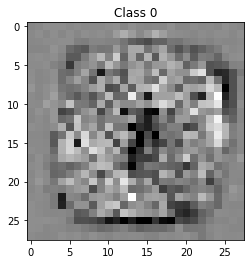

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


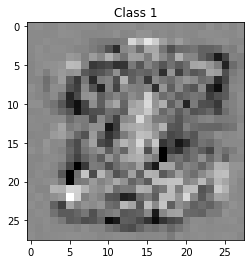

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


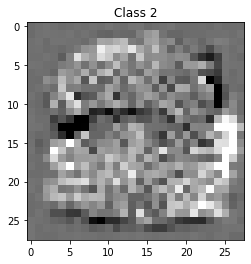

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


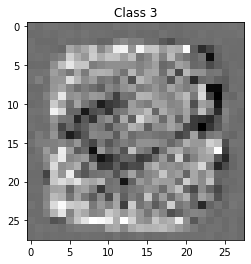

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


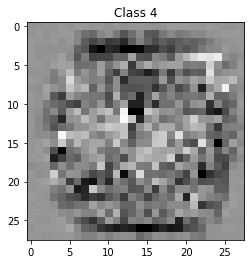

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


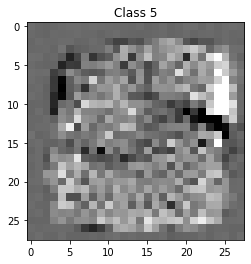

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


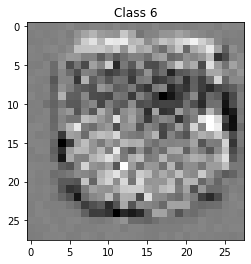

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


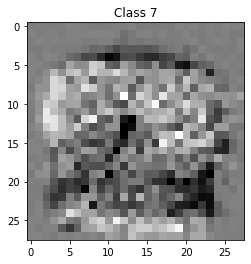

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


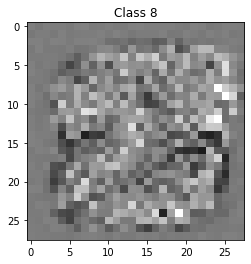

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


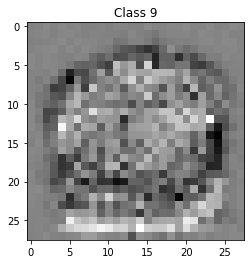

In [10]:
for parameter in network.parameters():
    for i in range(10):
        temp = torchvision.utils.make_grid(parameter[i].resize(28, 28))
        
        temp = temp / 2 + 0.5  # un-normalize
        temp_np = temp.numpy()
        
        plt.figure()
        plt.title("Class " + str(i))
        plt.imshow(np.transpose(temp_np, (1, 2, 0)))
        plt.show()
    
    break # we only need the first model parameter (weights)

In [11]:
limited_net = Net(num_inputs, num_outputs)
limited_optimizer = optim.SGD(network.parameters(), lr=lr)
# train only on 50 examples

def limited_train(epoch, train_loader):
    limited_net.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        
        if batch_idx >= 50:
            break
        
        data, target = Variable(data), Variable(target)
        limited_optimizer.zero_grad()
        output = limited_net(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        limited_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def limited_test(test_loader):
    limited_net.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = limited_net(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [12]:
# we shall use the same options

for i in range(1, epochs+1):
    limited_train(i, mnist_train_loader)

limited_test(mnist_test_loader)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.291900
Train Epoch: 2 [0/60000 (0%)]	Loss: 2.219618
Train Epoch: 3 [0/60000 (0%)]	Loss: 2.393300
Train Epoch: 4 [0/60000 (0%)]	Loss: 2.332140
Train Epoch: 5 [0/60000 (0%)]	Loss: 2.308849
Train Epoch: 6 [0/60000 (0%)]	Loss: 2.346315
Train Epoch: 7 [0/60000 (0%)]	Loss: 2.341777
Train Epoch: 8 [0/60000 (0%)]	Loss: 2.368142
Train Epoch: 9 [0/60000 (0%)]	Loss: 2.250969
Train Epoch: 10 [0/60000 (0%)]	Loss: 2.360958

Test set: Average loss: 2.3579, Accuracy: 1352/10000 (14%)



# **Answer (3):**
create needed blocks of code (and results) below

In [13]:
class MultiLayerNet(nn.Module):
    def __init__(self, in_features, nb_classes, nb_hidden_layer,
                 hidden_size, act=nn.ReLU):
        
        super(MultiLayerNet, self).__init__()
        
        self.act = act()
        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(in_features, hidden_size)
        self.fcs = nn.ModuleList([])
        self.out = nn.Linear(hidden_size, nb_classes)
                
        self.linear_relu_stack = None
        

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [14]:
lr = 0.01

for i in range(4):
    print("Learning Rate: " + str(lr), end=2*'\n')
    
    network = MultiLayerNet(num_inputs, num_outputs, 1, 1000)
    optimizer = optim.SGD(network.parameters(), lr=lr)
    
    network.fcs.extend(nn.ModuleList([nn.Linear(1000, 1000)]))
    
    network.linear_relu_stack = nn.Sequential(
            network.fc1,
            nn.ReLU(),
            network.fcs[0],
            nn.ReLU(),
            network.out,
        )

    for i in range(1, epochs+1):
        train(i, mnist_train_loader)

    test(mnist_test_loader)
    
    lr *= 10

Learning Rate: 0.01

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303910
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.893442
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.420338
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.831543
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.713873
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.501917
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.509303
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.489536
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.483296
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.320549
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.456443
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.379347
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.626516
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.184647
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.302013
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.377221
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.386691
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.259347
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.592830
Train Epoch: 2 [57600/60000 (96%)]	Loss: 

Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.009362
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.020441
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.048365
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.034904
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.041605
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.106009
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.012205
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.012183
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.023667
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.038877
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.037462
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.009528
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.037128
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.033991
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.015405
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.043830
Train Epoch: 9 [0/60000 (0%)]	Loss: 0.023752
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.041401
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.033304
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.031587
Train Epoch:

Train Epoch: 3 [57600/60000 (96%)]	Loss: nan
Train Epoch: 4 [0/60000 (0%)]	Loss: nan
Train Epoch: 4 [6400/60000 (11%)]	Loss: nan
Train Epoch: 4 [12800/60000 (21%)]	Loss: nan
Train Epoch: 4 [19200/60000 (32%)]	Loss: nan
Train Epoch: 4 [25600/60000 (43%)]	Loss: nan
Train Epoch: 4 [32000/60000 (53%)]	Loss: nan
Train Epoch: 4 [38400/60000 (64%)]	Loss: nan
Train Epoch: 4 [44800/60000 (75%)]	Loss: nan
Train Epoch: 4 [51200/60000 (85%)]	Loss: nan
Train Epoch: 4 [57600/60000 (96%)]	Loss: nan
Train Epoch: 5 [0/60000 (0%)]	Loss: nan
Train Epoch: 5 [6400/60000 (11%)]	Loss: nan
Train Epoch: 5 [12800/60000 (21%)]	Loss: nan
Train Epoch: 5 [19200/60000 (32%)]	Loss: nan
Train Epoch: 5 [25600/60000 (43%)]	Loss: nan
Train Epoch: 5 [32000/60000 (53%)]	Loss: nan
Train Epoch: 5 [38400/60000 (64%)]	Loss: nan
Train Epoch: 5 [44800/60000 (75%)]	Loss: nan
Train Epoch: 5 [51200/60000 (85%)]	Loss: nan
Train Epoch: 5 [57600/60000 (96%)]	Loss: nan
Train Epoch: 6 [0/60000 (0%)]	Loss: nan
Train Epoch: 6 [6400/60000 

# **Answer (4):**
create needed blocks of code (and results) below

In [18]:
dataset = 'cifar10'
lr = 0.01

In [120]:
class ConvNet(nn.Module):
    
    def __init__(self, in_features, nb_classes):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 16, (5, 5), (2, 2))#with tanh
        self.conv2 = nn.Conv2d(16, 64, (3, 3), (1, 1))#with tanh
        self.conv3 = nn.Conv2d(64, 64, (3, 3), (1, 1))#with tanh
        self.fc1 = nn.Linear(16 * 64 * 64, 64) 
        self.first_linear = nn.Linear(64, 64)
        self.second_linear = nn.Linear(64, 10)
        
        self.linear_relu_stack = nn.Sequential(
            self.conv1,
            nn.ReLU(),
            self.conv2,
            nn.ReLU(),
            self.conv3,
            nn.ReLU(),
            nn.MaxPool2d(2),
#             nn.Flatten(),
            self.fc1,
            nn.ReLU(),
            self.first_linear,
            nn.ReLU(),
            self.second_linear
        )
        
        
    def forward(self, x):
#         x = F.relu(self.conv1(x)) 
#         x = F.relu(self.conv2(x)) 
#         x = F.relu(self.conv3(x)) 
#         # Run max pooling over x
#         x = F.max_pool2d(x, 2)
#         x = torch.flatten(x)
#         x = self.fc1(x)
#         # Pass data through first_linear
#         x = self.first_linear(x)
#         x = F.relu(x)
#         x = self.second_linear(x)
#         return x
        x = nn.Flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [121]:
epochs = 20 
network = ConvNet(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)
for i in range(1, epochs+1):
    train(i, mnist_train_loader)

res = test(mnist_test_loader)
for i in range(epochs-1):
    plt.plot((i, res[i]), (i + 1, res[i + 1]))
    
plt.show()




TypeError: conv2d() received an invalid combination of arguments - got (Flatten, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!Flatten!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!Flatten!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
